In [1]:
import sys
sys.path.append('/cluster/sj1/bb_opt/scripts')

In [2]:
%load_ext autoreload
%autoreload 2

import torch
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collect_stats as cs

%matplotlib inline

In [3]:
import collect_stats as cs

In [4]:
exp_folder = '/cluster/sj1/bb_opt/experiments'
test_filepath = '/cluster/sj1/bb_opt/data/tatsu_pbm/test_files'
filedir = '/cluster/sj1/bb_opt/data/paper_data2'
num_tfs_to_test = 38
batches = [10, 20, 100, 200]
batches = [10]
num_acks = 15

In [5]:
with open(test_filepath, 'r') as f:
    filenames = [k.strip() for k in f.readlines()][:num_tfs_to_test]

In [6]:
def sigmoid(x, exp=np.exp):
  return 1.0 / (1.0 + exp(-x))

In [7]:
filenames = [
    'HESX1_E149K_R1_8mers.txt',
    'EGR2_D383Y_R1_8mers.txt',
    'BCL6_H676Y_R1_8mers.txt',
    'ARX_L343Q_R1_8mers.txt',
    'CRX_E80A_R1_8mers.txt',
    'ESX1_K193R_R1_8mers.txt',
    'FOXC1_F112S_R1_8mers.txt',
    'GFI1B_A204T_R1_8mers.txt',
    'GFI1_L400F_R1_8mers.txt',
    'HOXC4_N178S_R1_8mers.txt',
    'HOXD13_I322L_R1_8mers.txt',
    'ISX_R83Q_R1_8mers.txt',
    'KLF11_R402Q_R1_8mers.txt',
    'KLF1_E325K_R1_8mers.txt',
    'MSX2_P148H_R1_8mers.txt',
    'NKX2-5_K183E_R1_8mers.txt',
    'NR1H4_C144R_R1_8mers.txt',
    'NR2E3_G56R_R1_8mers.txt',
    'OVOL2_D228E_R1_8mers.txt',
    'PAX3_G48R_R1_8mers.txt',
    'PAX4_R183C_R1_8mers.txt',
    'PAX6_A79E_R1_8mers.txt',
    'PAX7_P112L_R1_8mers.txt',
    'PBX4_R215Q_R1_8mers.txt',
    'PHOX2B_Q143R_R1_8mers.txt',
    'PITX2_L100Q_R1_8mers.txt',
    'POU3F4_A237G_R1_8mers.txt',
    'POU4F3_K277R_R1_8mers.txt',
    'POU6F2_E639K_R1_8mers.txt',
    'PROP1_R112Q_R1_8mers.txt',
    'SIX6_H141N_R1_8mers.txt',
    'SNAI2_D119E_R1_8mers.txt',
    'VAX2_L139M_R1_8mers.txt',
    'VENTX_E101K_R1_8mers.txt',
    'VSX1_G160D_R1_8mers.txt',
    'WT1_F392L_R1_8mers.txt',
    'ZNF200_H322Y_R1_8mers.txt',
    'ZNF655_E327G_R1_8mers.txt',
]

In [8]:
tf_max = {}
tf_labels = {}
for tf in filenames:
    labels = np.load(filedir + "/" + tf + "/labels.npy")
    labels = np.log(labels)
    tf_max[tf] = float(labels.max())
    tf_labels[tf] = labels

In [9]:
arrs = {}

In [10]:
import collect_stats as cs

In [44]:
to_read = {
    #'ensemble7/o_none_ucb_modelseed_': [None, 'e7'],
    #'ensemble7/o_none_ucb_ucb_step_0.1_modelseed_': [None, 'e7_ucb_step_0.1'],
    #'ensemble7/o_none_ucb_maxvar_g000510204080_modelseed_': [None, 'e7_maxvar_g80'],
    #'ensemble7/o_none_ucb_maxinoutvar_g000510204080_modelseed_': [None, 'e7_inoutvar_g80'],
    #'ensemble7/o_none_ucb_maxinvar_g000510204080_modelseed_': [None, 'e7_invar_g80'],
    #'ensemble7/o_none_ucb_dataseed_modelseed_': [None, 'e7'],
    #'ensemble7/o_none_ucb_invar_g000510204080_dataseed_modelseed_' : [None, 'e7_datarand_invar_g80'],
    #'ensemble7/o_none_ucb_maxvar_g000510204080_dataseed_modelseed_' : [None, 'e7_maxvar_g80'],
    #'ensemble7/o_none_ucb_inoutvar_g000510204080_dataseed_modelseed_': [None, 'e7_datarand_inoutvar_g80'],
    #'ensemble7/o_none_ucb_maxvar_inverse_g000510204080_': [None, 'MODD'],
    #'ensemble9/o_none_ucb_modelseed_': [None, 'e9'],
    #'ensemble9/o_none_ucb_maxvar_g000510204080_modelseed_': [None, 'e9_maxvar_g80'],
    #'ensemble9/o_none_ucb_maxinvar_g000510204080_modelseed_': [None, 'e9_invar_g80'],
    #'ensemble9/o_none_ucb_maxinoutvar_g000510204080_modelseed_': [None, 'e9_inoutvar_g80'],
    #'ensemble7/o_kriging_believer_kb_modelseed_': [None, 'e7_kb'],
    #'ensemble7/o_empirical_kb_div_3_modelseed_': [None, 'e7_empirical_kb'],
    #'ensemble7/o_empirical_kb_ucb_weighted_div_10_modelseed_': [None, 'e7_wekb_div10'],
    #'ensemble7/o_empirical_kb_ucb_weighted_0.5_div_10_modelseed_': [None, 'e7_wekb_0.5_div10'],
    #'ensemble7/o_empirical_kb_ucb_weighted_mean_0.5_div_10_modelseed_': [None, 'e7_wekb_mean_0.5_div10'],
    #'ensemble7/o_kb_dataseed_modelseed_': [None, 'e7_datarand_kb'],
    #'ensemble10/o_kb_dataseed_modelseed_': [None, 'e10_datarand_kb'],
    #'ensemble10/o_empirical_kb_ucb_weighted_0.5_div_10_dataseed_modelseed_': [None, 'e10_datarand_wekb_div10'],
    #'ensemble11/o_kb_dataseed_modelseed_': [None, 'e11_datarand_kb'],
    #'ensemble11/o_empirical_kb_ucb_weighted_0.5_div_10_dataseed_modelseed_': [None, 'e11_datarand_wekb_div10'],
    #'ensemble11/o_kb_malaria_dataseed_modelseed_': [None, 'mal_datarand_kb'],
    #'ensemble11/o_empirical_kb_malaria_ucb_weighted_0.5_div_10_dataseed_modelseed_': [None, 'mal_datarand_wekb_div10'],
    #'ensemble11/o_kb_nolog_malaria_dataseed_modelseed_': [None, 'mal_datarand_kb_nolog'],
    #'ensemble12/o_none_ucb_': [None, 'e7_2'],
    #'ensemble12/o_none_ucb_maxinvar_g000510204080_': [None, 'maxinvar2'],
    #'ensemble12/o_none_ucb_maxvar_g000510204080_': [None, 'maxvar2'],
    #'ensemble12/o_none_ucb_maxvar_id_g000510204080_': [None, 'modr2'],
    #'ensemble13/o_info_mves_div_5_minhsic_1_': [None, 'mves_div_5_minhsic_1'],
    #'ensemble13/o_info_mves_div_5_minhsic_0.05_bs_0_': [None, 'mves_bs_0'],
    #'ensemble13/o_none_ucb_': [None, 'e13'],
    #'ensemble13/o_pdts_ucb_rand_randdiv_3_': [None, 'pdts_randdiv_3'],
    #'ensemble13_init_train_20/o_info_mves_div_5_minhsic_0.05_bs_0_': [None, 'mves_bs_0_it20'],
    #'ensemble13_init_train_20/o_info_mves_div_5_minhsic_0.05_bs_0_fill_pdts_': [None, 'mves_bs_0_it20_fp'],
    #'ensemble13_init_train_20/o_info_mves_div_5_minhsic_0.0_bs_0_fill_pdts_': [None, 'mves_bs_0_it20_fp_mh_0'],
    #'ensemble13_init_train_20/o_none_ucb_': [None, 'e13_it20'],
    #'ensemble13_init_train_20/o_none_ucb_rand_randdiv_3_': [None, 'e13_it20_randdiv_3'],
    #'ensemble13_init_train_20/o_none_ucb_rand_randdiv_2_': [None, 'e13_it20_randdiv_2'],
    #'ensemble13_init_train_20/o_none_ucb_rand_randdiv_1_': [None, 'e13_it20_randdiv_1'],
    #'ensemble13_init_train_20/o_info_rand_mves_div_5_randdiv_1_': [None, 'mves_it20_fucb_randdiv_1'],
    #'ensemble13_init_train_20/o_ei_ucb_': [None, 'ei_it20'],
    #'ensemble13_init_train_20/o_pdts_ucb_rand_div_5_': [None, 'pdts_rand_div_5'],
    #'ensemble13_init_train_20/o_pdts_ucb_rand_div_3_': [None, 'pdts_rand_div_3'],
    #'ensemble13_init_train_20/o_info_rand_mves_div_5_fucb_randdiv_3_': [None, 'mves_it20_div_5_randdiv_3_fucb'],
    #'ensemble13_init_train_20/o_info_rand_mves_div_5_fp_randdiv_3_': [None, 'mves_it20_div_5_randdiv_3_fp'],
    #'ensemble13_init_train_20/o_info_mves_div_5_minhsic_0.05_bs_0.9_': [None, 'mves_bs_0.9_it20'],
    #'ensemble13_init_train_20/o_pdts_ucb_': [None, 'pdts_it20'],
    #'ensemble13_init_train_20/o_info_mves_div_1_minhsic_0.05_bs_0_fill_pdts_': [None, 'mves_div_1_bs_0_it20'],
    #'ensemble13_init_train_20/o_er_pdts_ucb_div_5_': [None, 'er_pdts_div_5_it20'],
    #'ensemble13_init_train_10/o_info_mves_div_5_minhsic_0.05_bs_0_fill_pdts_': [None, 'mves_bs_0_it10_fp'],
    #'ensemble13_init_train_10/o_pdts_ucb_': [None, 'pdts_it10'],
    #'ensemble13/o_pdts_ucb_': [None, 'pdts'],
    #'ensemble13/o_info_pdts_cond_div_2_fp_': [None, 'pdts_cond_fp'],
    #'ensemble13/o_info_pdts_cond_div_5_lasso_fp_': [None, 'lasso'],
    #'ensemble13/o_pdts_ucb_rand_div_5_rdiv_condense_0.5_': [None, 'pdts_rdiv_condense_0.5'],
    'ensemble13/o_pdts_ucb_rand_div_5_rdiv_condense_1_': [None, 'pdts_rdiv_condense_1'],
    #'ensemble13/o_pdts_ucb_rand_div_5_rdiv_condense_2_': [None, 'pdts_rdiv_condense_2'],
    #'ensemble13/o_info_m80_mves_div_5_fp_': [None, 'mves_m80_fp'],
    #'ensemble13/o_info_pdts_cond_div_20_lasso_fp_': [None, 'pdts_cond_lasso_fp'],
    #'ensemble13/o_info_mves_div_5_fp_': [None, 'mves_fp'],
    #'ensemble13/o_pdts_ucb_rand_rdiv_1_': [None, 'pdts_rand_rdiv_1'],
    #'ensemble13/o_none_ucb_rand_rdiv_1_': [None, 'ucb_rand_rdiv_1'],
    #'ensemble13/o_none_ucb_0.9_': [None, 'bs_0.9'],
    #'ensemble13/o_info_mves_div_5_minhsic_0.05_bs_0.9_': [None, 'mves_bs_0.9'],
}

In [63]:
for k in to_read:
    arrs[k] = to_read[k]
for experiment in to_read:
    print('reading', experiment)
    arrs[experiment][0] = cs.get_data(exp_folder, experiment, batches, num_samples=20, mode="bayes_opt")
    #cs.get_data(exp_folder, experiment, batches, num_samples=20, mode="bayes_opt")

reading ensemble13/o_pdts_ucb_rand_div_5_rdiv_condense_1_
reading sample 1
reading sample 2
reading sample 3
reading sample 4
reading sample 5
reading sample 6
reading sample 7
reading sample 8
reading sample 9
reading sample 10
reading sample 11
reading sample 12
reading sample 13
reading sample 14
reading sample 15
reading sample 16
reading sample 17
reading sample 18
reading sample 19
reading sample 20


In [75]:
to_eval = [
    'ensemble13/o_pdts_ucb_',
    'ensemble13/o_info_pdts_cond_div_5_lasso_fp_',
    'ensemble13/o_pdts_ucb_rand_div_5_rdiv_condense_0.5_',
    'ensemble13/o_pdts_ucb_rand_div_5_rdiv_condense_1_',
]

In [14]:
idx_data_extractor = lambda x, filename : x['idx_frac'][0].item()

In [15]:
ack_rel_opt_val_data_extractor = lambda x, filename : x['ack_rel_opt_value']

In [16]:
train_rmse_fn = lambda x, filename : x['logging'][1]['train']['std']

In [17]:
def ir_regret_fn(x, filename): 
    temp = x['ir_batch_cur_idx'].numpy().tolist()
    temp2 = set(x['ack_idx'].numpy().tolist())
    temp3 = None
    for k in temp[::-1]:
        if k not in temp2:
            break
    return np.exp(max(tf_labels[filename][k], tf_labels[filename][x['ack_idx']].max()))

def ack_regret_fn(x, filename): 
    return np.exp(max(tf_labels[filename][x['ack_idx']].max(), tf_labels[filename][x['idx_at_each_iter'][0]].max()))
    #return np.exp(tf_labels[filename][x['ack_idx']].max())



In [43]:
cs.prop_test(10, 
             filenames,
             idx_data_extractor,
             #ack_rel_opt_val_data_extractor,
             arrs, 
             [to_eval[3], to_eval[1]],
             29,
             pval_threshold=1,
             paired_test=True,
             single_test=True,
            )

comparing pdts_rdiv_condense_1 lasso
EGR2_D383Y_R1_8mers.txt 0.22305911368403125 0.7769408863159688 0.1376524400897324 0.12743902327492834 	 (std: 0.06316 0.08019, #n: 20 20)
ESX1_K193R_R1_8mers.txt 0.34383949007104064 0.6561605099289594 0.46402439177036287 0.458384145796299 	 (std: 0.07839 0.06133, #n: 20 20)
GFI1B_A204T_R1_8mers.txt 0.932539392858846 0.067460607141154 0.08963414654135704 0.09908536598086357 	 (std: 0.03583 0.03224, #n: 20 20)
HOXD13_I322L_R1_8mers.txt 0.8231604284650317 0.17683957153496832 0.3969512224197388 0.40198170244693754 	 (std: 0.02215 0.02288, #n: 20 20)
ISX_R83Q_R1_8mers.txt 0.48997818145944794 0.5100218185405521 0.4158536583185196 0.4155487835407257 	 (std: 0.05772 0.04392, #n: 20 20)
KLF11_R402Q_R1_8mers.txt 0.8753855546453029 0.1246144453546971 0.2815548785030842 0.2891768284142017 	 (std: 0.04573 0.03930, #n: 20 20)
NKX2-5_K183E_R1_8mers.txt 0.8217804591384874 0.17821954086151254 0.3230182945728302 0.3265243887901306 	 (std: 0.01492 0.01436, #n: 20 20)


In [82]:
cs.prop_test(10, 
             filenames, 
             ack_regret_fn,
             #ack_rel_opt_val_data_extractor,
             arrs,
             [to_eval[3], to_eval[1]],
             29,
             pval_threshold=1,
             paired_test=True,
             single_test=True,
            )

comparing pdts_rdiv_condense_1 lasso
HESX1_E149K_R1_8mers.txt 0.5845312387756435 0.4154687612243565 20453.832 20663.232 	 (std: 3759.67041 3460.87207, #n: 20 20)
EGR2_D383Y_R1_8mers.txt 0.2516321541293085 0.7483678458706915 68593.44 65919.92 	 (std: 19193.23633 20809.46484, #n: 20 20)
ARX_L343Q_R1_8mers.txt 0.978941205376929 0.021058794623071017 82094.72 82541.484 	 (std: 791.73315 1045.89417, #n: 20 20)
CRX_E80A_R1_8mers.txt 0.6828934704257318 0.3171065295742682 325953.22 328445.16 	 (std: 17448.41406 21436.79297, #n: 20 20)
ESX1_K193R_R1_8mers.txt 0.9186545286855446 0.0813454713144554 26248.324 27111.098 	 (std: 2919.44824 2408.66748, #n: 20 20)
FOXC1_F112S_R1_8mers.txt 0.9696138357206636 0.03038616427933642 84638.39 84803.984 	 (std: 371.11258 180.55783, #n: 20 20)
GFI1B_A204T_R1_8mers.txt 0.9345066485577423 0.06549335144225761 143335.14 143901.66 	 (std: 8019.61914 7644.72803, #n: 20 20)
GFI1_L400F_R1_8mers.txt 0.9770232534328698 0.02297674656713017 78636.27 85329.16 	 (std: 13055.

In [419]:
cs.prop_test(10, 
             filenames, 
             ir_regret_fn, 
             arrs, 
             [to_eval[4], to_eval[2]],
             29,
             pval_threshold=1,
             paired_test=True,
            )

comparing pdts_rdiv_condense_2 lasso
ESX1_K193R_R1_8mers.txt 0.021114011137314422 26038.072 27111.098 1 	 (std: 2908.72388 2408.66748, #n: 20 20)
HOXD13_I322L_R1_8mers.txt 0.6159376386701855 306656.25 305763.38 0 	 (std: 18404.70703 17767.06445, #n: 20 20)
VENTX_E101K_R1_8mers.txt 0.4502001214851763 115707.39 116084.89 1 	 (std: 2583.15479 2096.63208, #n: 20 20)
combined pval: 0.61594 vs 0.05376
count: 2/3


In [268]:
cs.uniform_baseline(
    3,
    tf_labels,
    20, 
    filenames, 
    ack_regret_fn, 
    #ack_rel_opt_val_data_extractor,
    arrs,
    to_eval[5], 
    14, 
    pval_threshold=1, 
)

IndexError: list index out of range

In [ ]:
cs.prop_test(100, 
             filenames, 
             idx_data_extractor, 
             arrs, 
             [to_eval[-2], to_eval[-1]], 
             9,
             pval_threshold=0.2,
             paired_test=True,
            )

In [ ]:
cs.prop_test(100, filenames, ir_regret_fn, arrs, [to_eval[-2], to_eval[-1]], 9, pval_threshold=0.2, paired_test=True)

In [ ]:
cs.prop_test(100, filenames, ack_regret_fn, arrs, [to_eval[-2], to_eval[-1]], 9, pval_threshold=1.4, paired_test=True)

In [ ]:
cs.prop_test(200, 
             filenames, 
             idx_data_extractor, 
             arrs, 
             [to_eval[-2], to_eval[-1]], 
             29, 
             pval_threshold=1,
             paired_test=True,
            )

In [ ]:
cs.prop_test(200, filenames, ack_rel_opt_val_data_extractor, arrs, [to_eval[-2], to_eval[-1]], 29, pval_threshold=1.4, paired_test=True)

In [72]:
to_eval = [
    #'ensemble13/o_pdts_ucb_',
    'ensemble13/o_info_pdts_cond_div_5_lasso_fp_',
    #'ensemble13/o_pdts_ucb_rand_div_5_rdiv_condense_0.5_',
    'ensemble13/o_pdts_ucb_rand_div_5_rdiv_condense_1_',
]

In [ ]:
ack_iter = 14
for batch_size in [10]:
    print("BATCH SIZE", batch_size)
    for filename in filenames:
        filename_printed = False
        for experiment in to_eval:
            if len(arrs[experiment][0]) == 0:
                continue
            idx_frac = None
            num_used = 0
            val_nll = 0
            try:
                for stats in arrs[experiment][0]:
                    if filename not in stats:
                        continue
                    if batch_size not in stats[filename]:
                        continue
                    if len(stats[filename][batch_size]) <= ack_iter:
                        continue
                    num_used += 1
                    mean = 0
                    #for i in range(len(stats[filename][batch_size])):
                        #mean += stats[filename][batch_size][i]['logging'][1]['best']['nll']
                    if len(stats[filename][batch_size]) > 0:
                        mean /= (len(stats[filename][batch_size]))
                    #val_nll += stats[filename][batch_size][0]['logging'][1]['best']['nll']
                    val_nll += mean
                    if idx_frac is None:
                        idx_frac = stats[filename][batch_size][ack_iter]['idx_frac']
                        #idx_frac = tf_labels[filename][stats[filename][batch_size][ack_iter]['ir_batch_cur_idx'][-1]]
                        #idx_frac = stats[filename][batch_size][ack_iter]['corr_stats'][1]
                    else:
                        idx_frac = idx_frac + stats[filename][batch_size][ack_iter]['idx_frac']
                        #idx_frac = torch.max(idx_frac, stats[filename][batch_size][ack_iter]['idx_frac'])
                        #idx_frac = idx_frac + tf_labels[filename][stats[filename][batch_size][ack_iter]['ir_batch_cur_idx'][-1]]
                        #idx_frac = idx_frac + stats[filename][batch_size][ack_iter]['corr_stats'][1]
                if num_used > 0:
                    if not filename_printed:
                        print(filename)
                        filename_printed = True
                    idx_frac = idx_frac/num_used
                    #idx_frac = idx_frac.numpy()
                    print(arrs[experiment][1] + ":", " ".join(("{:6.6f}".format(k) for k in idx_frac)), ";", "{:6.2f}".format(val_nll/num_used), "val_nll ;", str(num_used), "samples")
                    #print(arrs[experiment][1] + ":", str(idx_frac), ";", "{:6.2f}".format(val_nll/num_used), "val_nll ;", str(num_used), "samples")
            except Exception as e:
                pass

In [59]:
import collect_stats as cs

/cluster/sj1/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/cluster/sj1/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


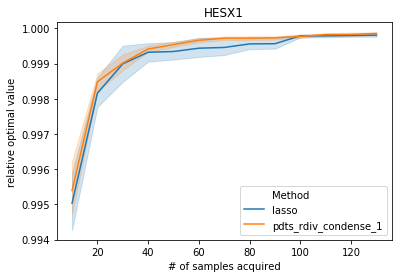

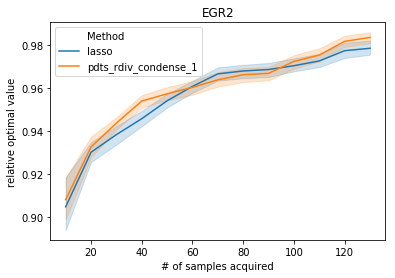

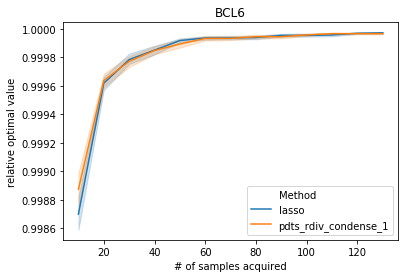

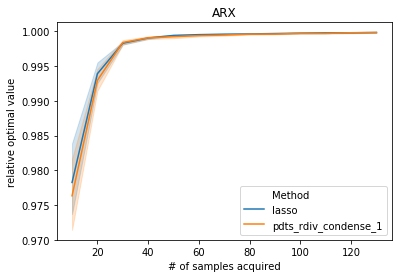

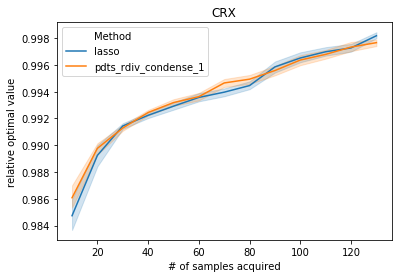

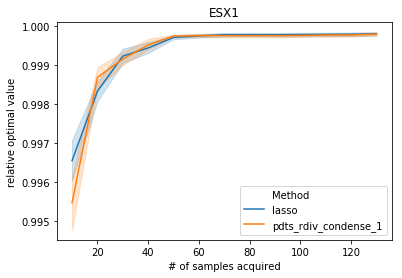

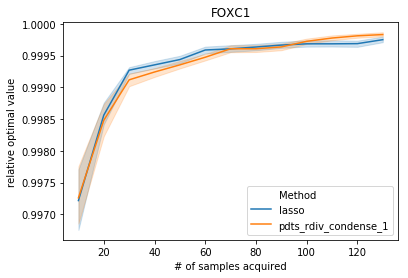

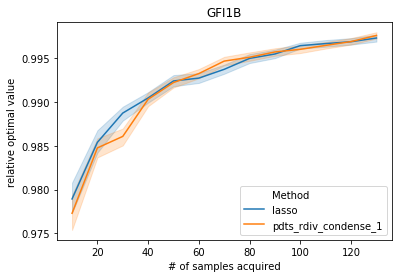

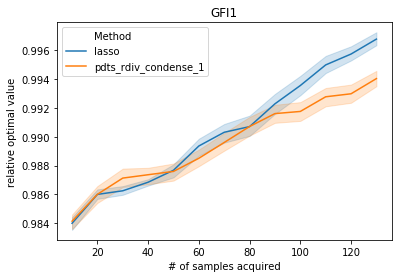

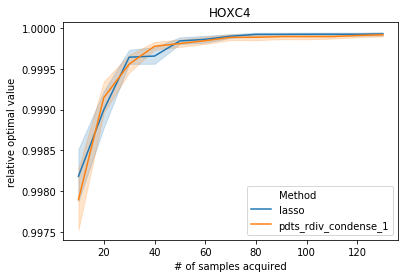

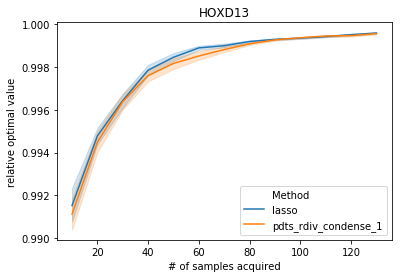

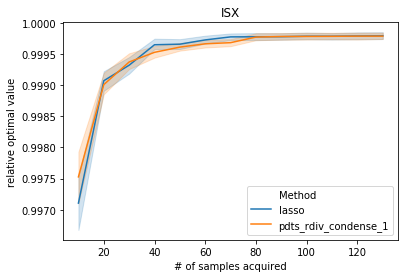

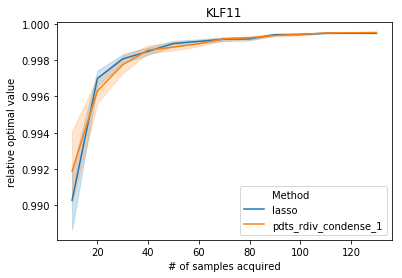

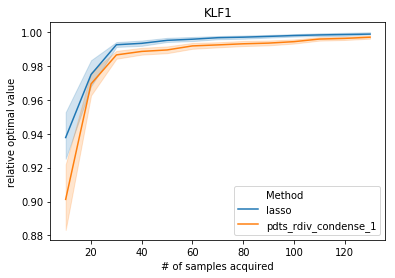

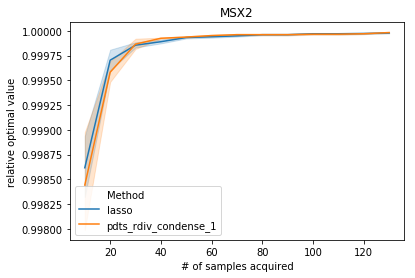

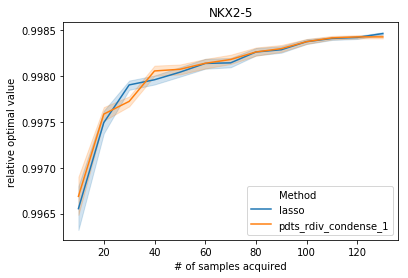

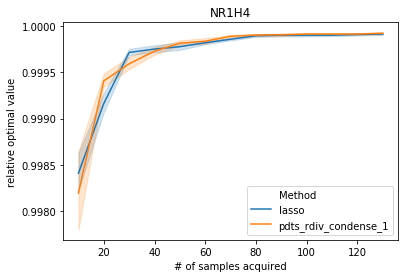

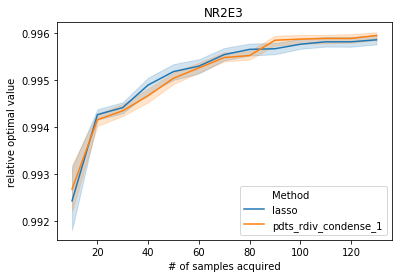

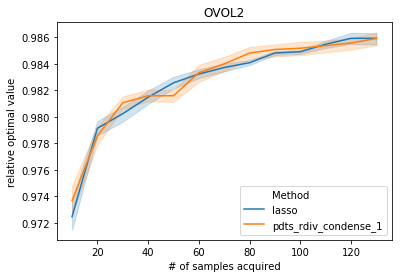

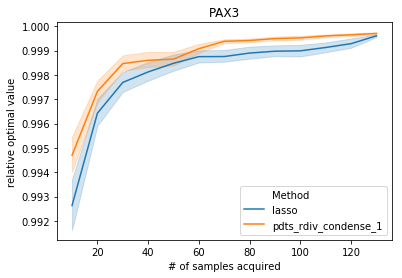

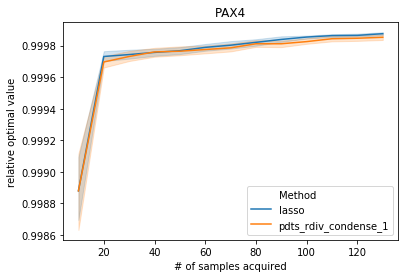

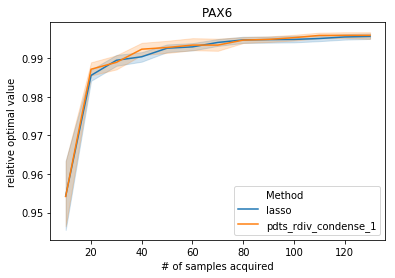

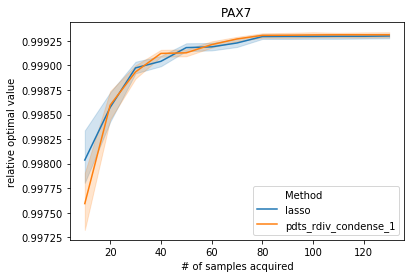

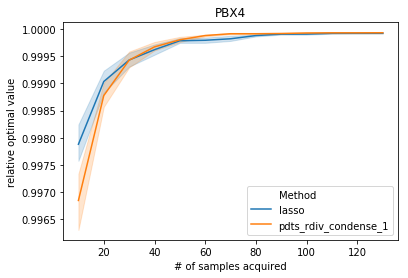

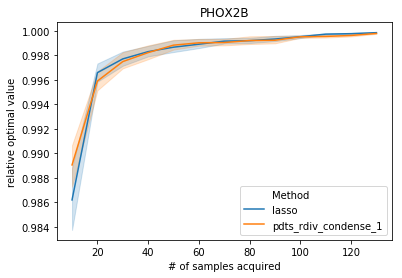

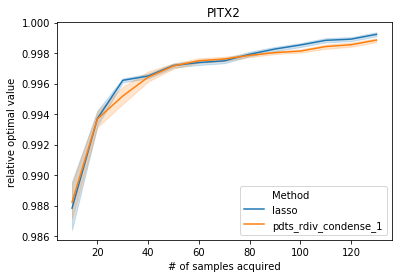

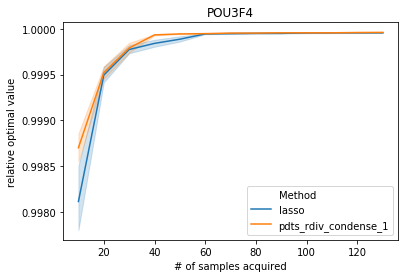

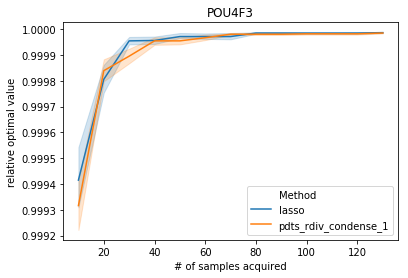

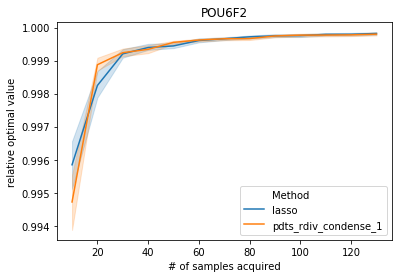

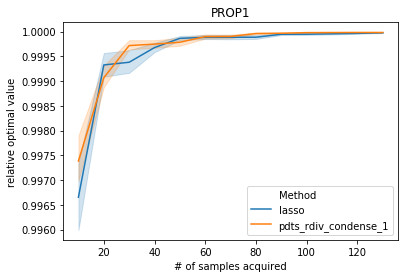

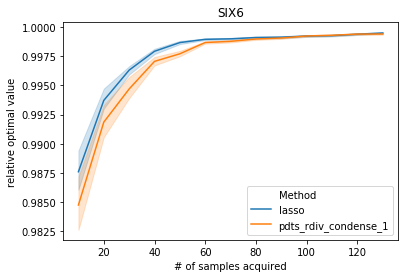

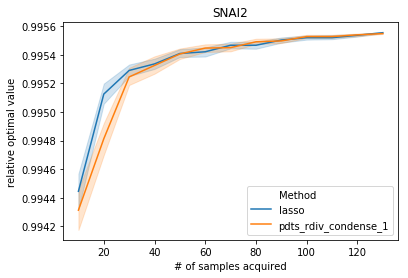

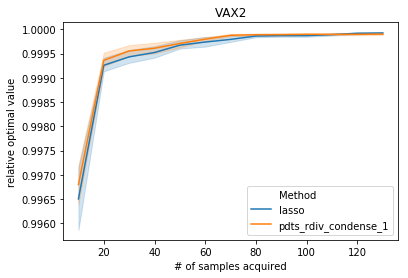

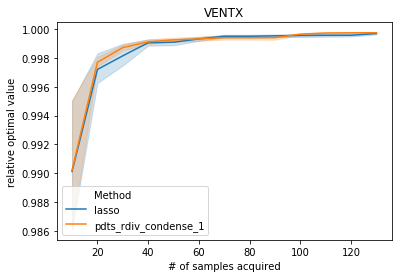

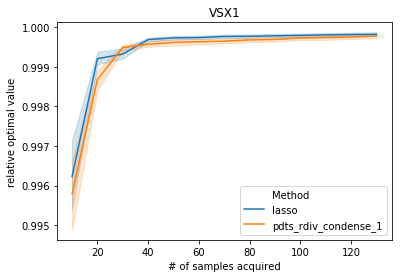

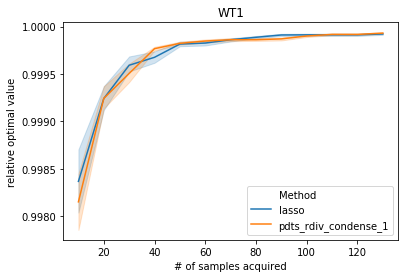

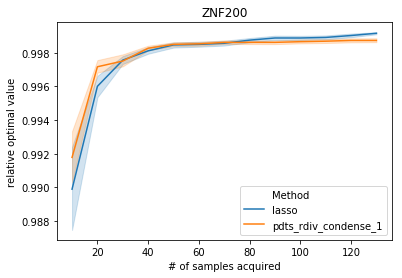

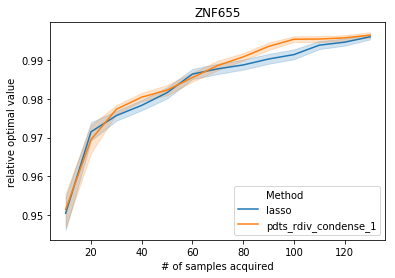

In [73]:
cs.plot_data_vs_ack_iter_with_ci(
    10,
    filenames,
    'relative optimal value',
    #ack_regret_fn,
    ack_rel_opt_val_data_extractor,
    14,
    arrs,
    to_eval,
    legend_loc=3,
    figsize=(6, 4),
    num_samples_label=True,
    #save_path='/cluster/sj1/bb_opt/plots',
    ci=50,
)